# Necessary libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import pickle

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("./CarPrice_Assignment.csv")

In [4]:
df = pd.DataFrame(data)

# Data Understanding

In [5]:
# Display descriptions for each feature.
descriptions = {
    'car_ID': "Unique identifier for each car",
    'symboling': "Insurance risk rating for the car",
    'CarName': "Name or model of the car",
    'fueltype': "Type of fuel used (gas or diesel)",
    'aspiration': "Method of air intake for the engine (std or turbo)",
    'doornumber': "Number of doors on the car",
    'carbody': "Type of car body or design (sedan, hatchback, etc.)",
    'drivewheel': "Type of drivetrain or wheels (FWD, RWD, 4WD)",
    'enginelocation': "Engine location (front or rear)",
    'wheelbase': "Distance between front and rear axles",
    'carlength': "Length of the car",
    'carwidth': "Width of the car",
    'carheight': "Height of the car",
    'curbweight': "Weight of the car without passengers or cargo",
    'enginetype': "Type of engine (ohc, ohcv, etc.)",
    'cylindernumber': "Number of cylinders in the engine",
    'enginesize': "Size of the engine (in cc or ci)",
    'fuelsystem': "Type of fuel injection system (mpfi, etc.)",
    'boreratio': "Ratio of cylinder bore diameter to stroke length",
    'stroke': "Length of the engine stroke",
    'compressionratio': "Engine compression ratio",
    'horsepower': "Engine power output (in hp)",
    'peakrpm': "Engine's peak RPM for generating power",
    'citympg': "Fuel efficiency in city driving (mpg)",
    'highwaympg': "Fuel efficiency on the highway (mpg)",
    'price': "Price of the car"
}

for column in df.columns:
    print(f"{column}: {descriptions.get(column, 'No description available')}")

car_ID: Unique identifier for each car
symboling: Insurance risk rating for the car
CarName: Name or model of the car
fueltype: Type of fuel used (gas or diesel)
aspiration: Method of air intake for the engine (std or turbo)
doornumber: Number of doors on the car
carbody: Type of car body or design (sedan, hatchback, etc.)
drivewheel: Type of drivetrain or wheels (FWD, RWD, 4WD)
enginelocation: Engine location (front or rear)
wheelbase: Distance between front and rear axles
carlength: Length of the car
carwidth: Width of the car
carheight: Height of the car
curbweight: Weight of the car without passengers or cargo
enginetype: Type of engine (ohc, ohcv, etc.)
cylindernumber: Number of cylinders in the engine
enginesize: Size of the engine (in cc or ci)
fuelsystem: Type of fuel injection system (mpfi, etc.)
boreratio: Ratio of cylinder bore diameter to stroke length
stroke: Length of the engine stroke
compressionratio: Engine compression ratio
horsepower: Engine power output (in hp)
peak

In [6]:
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [7]:
# check for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

####  there is no missing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
# check for duplicated values
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


In [10]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [11]:
df.describe(include='object')

CarName fueltype aspiration doornumber carbody drivewheel  \
count             205      205        205        205     205        205   
unique            147        2          2          2       5          3   
top     toyota corona      gas        std       four   sedan        fwd   
freq                6      185        168        115      96        120   

       enginelocation enginetype cylindernumber fuelsystem  
count             205        205            205        205  
unique              2          7              7          8  
top             front        ohc           four       mpfi  
freq              202        148            159         94

# Data Cleaning

In [12]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

#### observation : as you can see , it has name of company and car model , i dont like it i just want to have company name

In [13]:
df.insert(1, 'Company', df['CarName'].str.split(' ').str[0])

In [14]:
df.drop(columns=['CarName'],inplace=True)

In [15]:
df.head()

car_ID      Company  symboling fueltype aspiration doornumber      carbody  \
0       1  alfa-romero          3      gas        std        two  convertible   
1       2  alfa-romero          3      gas        std        two  convertible   
2       3  alfa-romero          1      gas        std        two    hatchback   
3       4         audi          2      gas        std       four        sedan   
4       5         audi          2      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0        rwd          front       88.6  ...         130        mpfi   
1        rwd          front       88.6  ...         130        mpfi   
2        rwd          front       94.5  ...         152        mpfi   
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [16]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
# let's correct the company names
company_name_mapping = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

df['Company'].replace(company_name_mapping, inplace=True)

In [18]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
# ok :)

In [20]:
# car_ID is not useful column
df.drop(columns=['car_ID'],inplace=True)

# Time to Visualization

#### 1 : Average Car Prices by Company

In [21]:
company_prices = df.groupby("Company")["price"].mean().reset_index()

fig = px.bar(company_prices, x="Company", y="price", title="Average Car Prices by Company")
fig.update_xaxes(categoryorder="total descending")  
fig.update_layout(xaxis_title="Company", yaxis_title="Average Price")
fig.show()

#### 2 : Correlation Heatmap

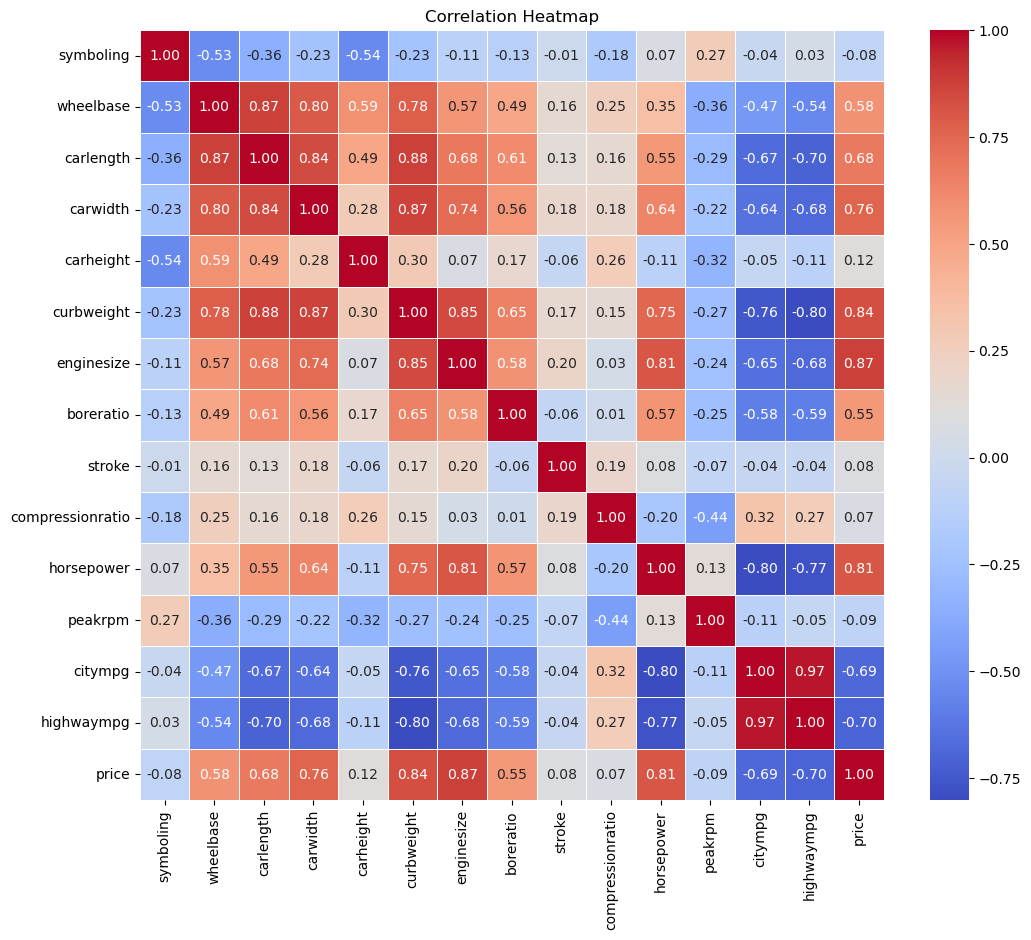

In [22]:
correlation_matrix = df.corr(numeric_only=True) 

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
df['carlength']

0      168.8
1      168.8
2      171.2
3      176.6
4      176.6
       ...  
200    188.8
201    188.8
202    188.8
203    188.8
204    188.8
Name: carlength, Length: 205, dtype: float64

#### 3 : Price VS Categorical columns

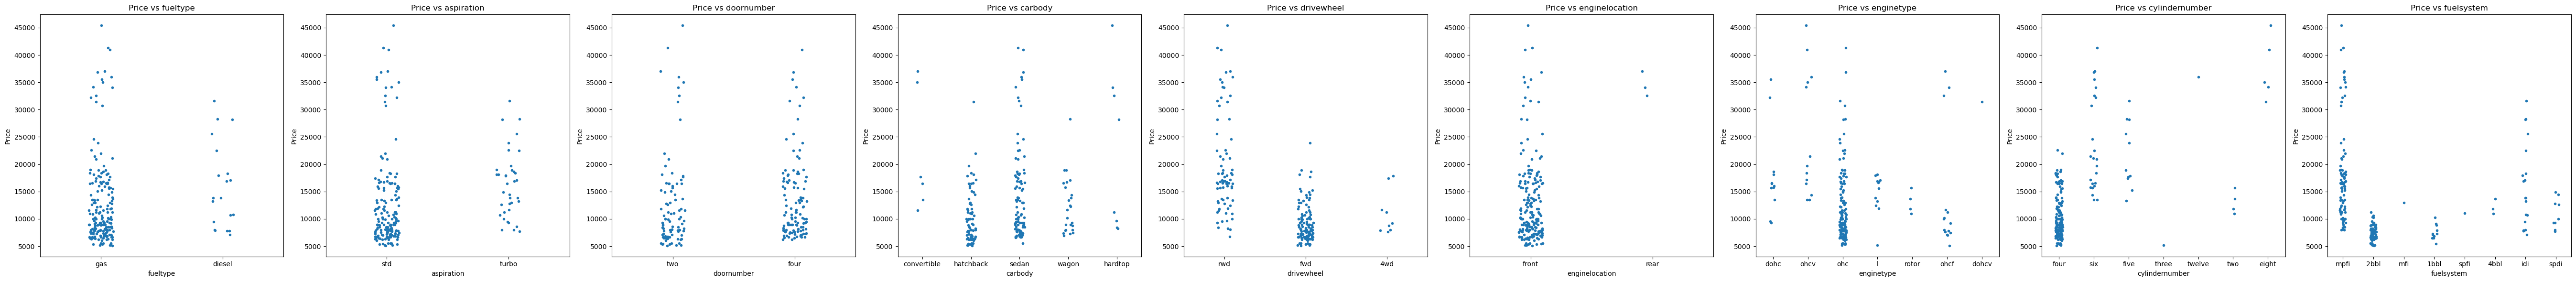

In [24]:
# Select the categorical columns we want to compare with "price" 
categorical_columns = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

num_cols = len(categorical_columns)
fig, axes = plt.subplots(1, num_cols, figsize=(6 * num_cols, 6))

for i, col in enumerate(categorical_columns):
    sns.stripplot(x=col, y="price", data=df, ax=axes[i], size=4) 
    axes[i].set_title(f"Price vs {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Price")

plt.tight_layout()
plt.show()


###  From the plots above, we can see the distribution of the parameters and their effect on the price ( I think this plot is wonderful )

#### 4 : Price VS Numerical columns

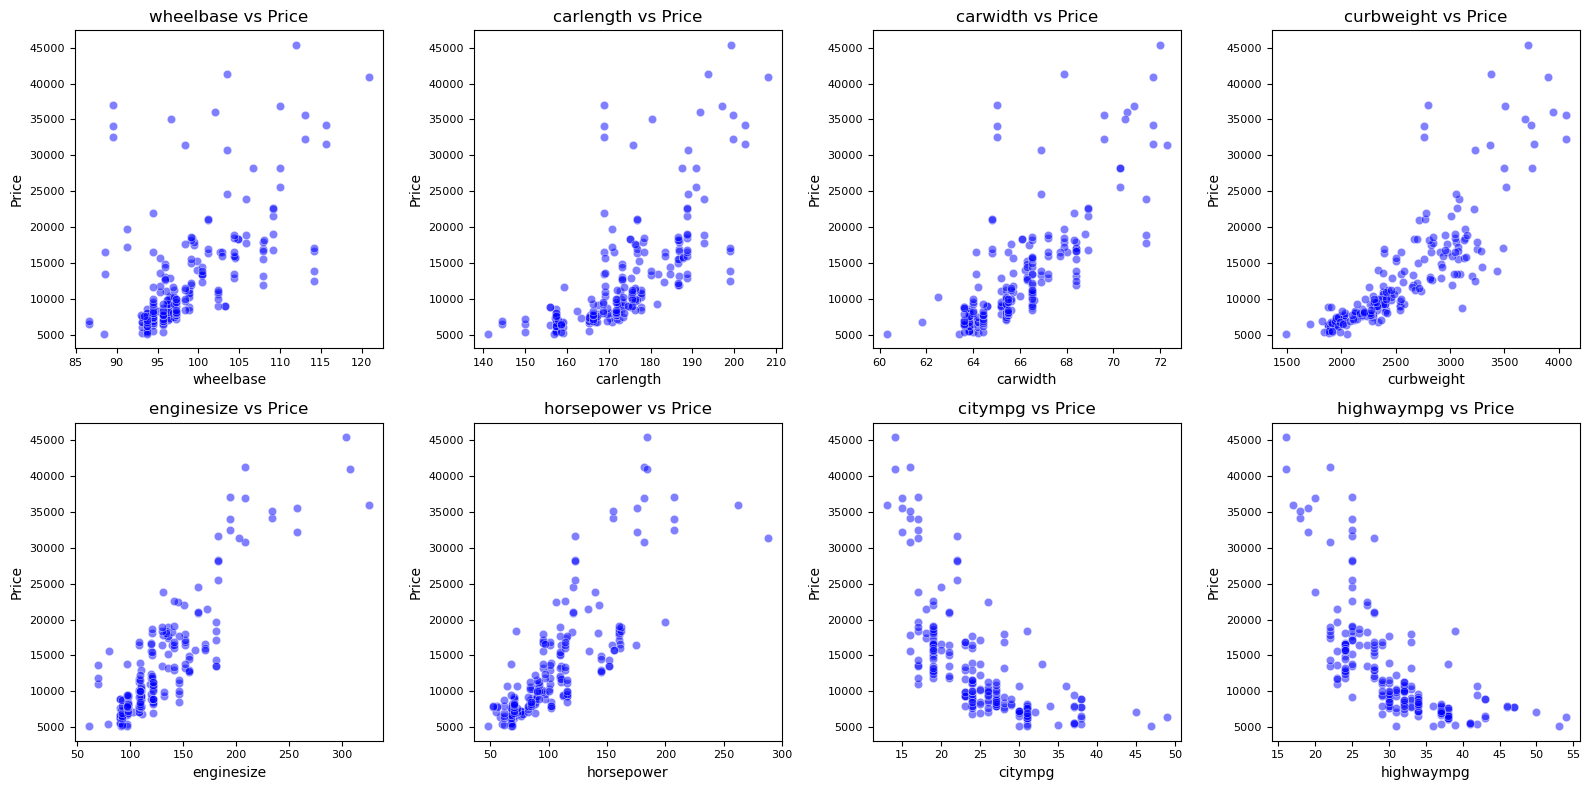

In [25]:
# Select the numerical columns we want to compare with "price" 
numerical_columns = ["wheelbase", "carlength", "carwidth", "curbweight", "enginesize", "horsepower", "citympg", "highwaympg"]

sns.set_palette("cool")

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=df, x=col, y="price", ax=axes[i], alpha=0.5, color="blue")
    axes[i].set_title(f"{col} vs Price", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Price", fontsize=10)
    axes[i].tick_params(axis="both", labelsize=8)

plt.tight_layout()
plt.show()

### From the graphs above, we can see the distributions and we can see the effect of the features on the price change.

# Preprocessing

In [26]:
# Drop numerical : symboling, wheelbase,  boreratio, stroke, compressionratio, peakrpm, Company
# Drop categorical : nothing

In [27]:
df2 = df.drop(columns=['symboling','wheelbase','boreratio','stroke','compressionratio','peakrpm','Company'])

In [28]:
df2.head(15)

fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0       gas        std        two  convertible        rwd          front   
1       gas        std        two  convertible        rwd          front   
2       gas        std        two    hatchback        rwd          front   
3       gas        std       four        sedan        fwd          front   
4       gas        std       four        sedan        4wd          front   
5       gas        std        two        sedan        fwd          front   
6       gas        std       four        sedan        fwd          front   
7       gas        std       four        wagon        fwd          front   
8       gas      turbo       four        sedan        fwd          front   
9       gas      turbo        two    hatchback        4wd          front   
10      gas        std        two        sedan        rwd          front   
11      gas        std       four        sedan        rwd          front   
12      gas        std        two        sedan        rwd          front   
13      gas        std       four        sedan        rwd          front   
14      gas        std       four        sedan        rwd          front   

    carlength  carwidth  carheight  curbweight enginetype cylindernumber  \
0       168.8      64.1       48.8        2548       dohc           four   
1       168.8      64.1       48.8        2548       dohc           four   
2       171.2      65.5       52.4        2823       ohcv            six   
3       176.6      66.2       54.3        2337        ohc           four   
4       176.6      66.4       54.3        2824        ohc           five   
5       177.3      66.3       53.1        2507        ohc           five   
6       192.7      71.4       55.7        2844        ohc           five   
7       192.7      71.4       55.7        2954        ohc           five   
8       192.7      71.4       55.9        3086        ohc           five   
9       178.2      67.9       52.0        3053        ohc           five   
10      176.8      64.8       54.3        2395        ohc           four   
11      176.8      64.8       54.3        2395        ohc           four   
12      176.8      64.8       54.3        2710        ohc            six   
13      176.8      64.8       54.3        2765        ohc            six   
14      189.0      66.9       55.7        3055        ohc            six   

    enginesize fuelsystem  horsepower  citympg  highwaympg      price  
0          130       mpfi         111       21          27  13495.000  
1          130       mpfi         111       21          27  16500.000  
2          152       mpfi         154       19          26  16500.000  
3          109       mpfi         102       24          30  13950.000  
4          136       mpfi         115       18          22  17450.000  
5          136       mpfi         110       19          25  15250.000  
6          136       mpfi         110       19          25  17710.000  
7          136       mpfi         110       19          25  18920.000  
8          131       mpfi         140       17          20  23875.000  
9          131       mpfi         160       16          22  17859.167  
10         108       mpfi         101       23          29  16430.000  
11         108       mpfi         101       23          29  16925.000  
12         164       mpfi         121       21          28  20970.000  
13         164       mpfi         121       21          28  21105.000  
14         164       mpfi         121       20          25  24565.000

### Convert categorical values to binary columns

In [29]:
df2 = pd.get_dummies(columns=["fueltype","enginelocation","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem"],data=df2)

In [30]:
df2.head(15)

carlength  carwidth  carheight  curbweight  enginesize  horsepower  \
0       168.8      64.1       48.8        2548         130         111   
1       168.8      64.1       48.8        2548         130         111   
2       171.2      65.5       52.4        2823         152         154   
3       176.6      66.2       54.3        2337         109         102   
4       176.6      66.4       54.3        2824         136         115   
5       177.3      66.3       53.1        2507         136         110   
6       192.7      71.4       55.7        2844         136         110   
7       192.7      71.4       55.7        2954         136         110   
8       192.7      71.4       55.9        3086         131         140   
9       178.2      67.9       52.0        3053         131         160   
10      176.8      64.8       54.3        2395         108         101   
11      176.8      64.8       54.3        2395         108         101   
12      176.8      64.8       54.3        2710         164         121   
13      176.8      64.8       54.3        2765         164         121   
14      189.0      66.9       55.7        3055         164         121   

    citympg  highwaympg      price  fueltype_diesel  ...  \
0        21          27  13495.000                0  ...   
1        21          27  16500.000                0  ...   
2        19          26  16500.000                0  ...   
3        24          30  13950.000                0  ...   
4        18          22  17450.000                0  ...   
5        19          25  15250.000                0  ...   
6        19          25  17710.000                0  ...   
7        19          25  18920.000                0  ...   
8        17          20  23875.000                0  ...   
9        16          22  17859.167                0  ...   
10       23          29  16430.000                0  ...   
11       23          29  16925.000                0  ...   
12       21          28  20970.000                0  ...   
13       21          28  21105.000                0  ...   
14       20          25  24565.000                0  ...   

    cylindernumber_twelve  cylindernumber_two  fuelsystem_1bbl  \
0                       0                   0                0   
1                       0                   0                0   
2                       0                   0                0   
3                       0                   0                0   
4                       0                   0                0   
5                       0                   0                0   
6                       0                   0                0   
7                       0                   0                0   
8                       0                   0                0   
9                       0                   0                0   
10                      0                   0                0   
11                      0                   0                0   
12                      0                   0                0   
13                      0                   0                0   
14                      0                   0                0   

    fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  fuelsystem_mfi  \
0                 0                0               0               0   
1                 0                0               0               0   
2                 0                0               0               0   
3                 0                0               0               0   
4                 0                0               0               0   
5                 0                0               0               0   
6                 0                0               0               0   
7                 0                0               0               0   
8                 0                0               0               0   
9                 0                0               0               0   
10       

In [31]:
# Done

# Modeling

In [32]:
X = df2.drop(columns=['price'])
y = df2['price'].values.reshape(-1,1)

In [33]:
X.shape

(205, 46)

In [34]:
y.shape

(205, 1)

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Standardize

In [36]:
scaler=StandardScaler()

In [37]:
X_train=scaler.fit_transform(X_train)

In [38]:
X_test=scaler.transform(X_test)

In [39]:
pickle.dump(scaler,open('scaling.pkl','wb'))

In [40]:
X_train

array([[ 0.07244984,  0.08381686,  0.27677891, ..., -0.95235327,
        -0.19487094, -0.07832604],
       [ 1.04391556,  1.17026768,  1.20726917, ...,  1.05003052,
        -0.19487094, -0.07832604],
       [-0.36761583, -1.09710795,  2.17821552, ..., -0.95235327,
        -0.19487094, -0.07832604],
       ...,
       [-0.73295337, -1.00263396,  0.31723501, ..., -0.95235327,
        -0.19487094, -0.07832604],
       [ 0.77821554,  0.83960873, -0.69416744, ...,  1.05003052,
        -0.19487094, -0.07832604],
       [ 0.86954992,  0.27276483,  0.96453258, ...,  1.05003052,
        -0.19487094, -0.07832604]])

## Regressions

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Reshape the target variables to 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()

# Create a list of regression models to evaluate
regression_models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=100),
    SVR(),
    KNeighborsRegressor()
]

training_scores = []
testing_scores = []

def model_prediction(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train, x_train_pred) * 100
    b = r2_score(y_test, x_test_pred) * 100
    training_scores.append(a)
    testing_scores.append(b)
    
    print(f"R2 Score of {type(model).__name__} model on Training Data: {a:.2f}")
    print(f"R2 Score of {type(model).__name__} model on Testing Data: {b:.2f}")

for model in regression_models:
    print(f"Evaluating {type(model).__name__} model : ")
    model_prediction(model, X_train, y_train, X_test, y_test)
    print("\n")

best_model_index = testing_scores.index(max(testing_scores))
best_model = regression_models[best_model_index]
best_test_score = testing_scores[best_model_index]

print(f"The best model is {type(best_model).__name__} with an R2 score of {best_test_score:.2f} on the testing data.")


Evaluating LinearRegression model : 
R2 Score of LinearRegression model on Training Data: 93.40
R2 Score of LinearRegression model on Testing Data: 87.48


Evaluating DecisionTreeRegressor model : 
R2 Score of DecisionTreeRegressor model on Training Data: 99.87
R2 Score of DecisionTreeRegressor model on Testing Data: 90.47


Evaluating RandomForestRegressor model : 
R2 Score of RandomForestRegressor model on Training Data: 98.61
R2 Score of RandomForestRegressor model on Testing Data: 95.70


Evaluating SVR model : 
R2 Score of SVR model on Training Data: -10.94
R2 Score of SVR model on Testing Data: -10.05


Evaluating KNeighborsRegressor model : 
R2 Score of KNeighborsRegressor model on Training Data: 87.01
R2 Score of KNeighborsRegressor model on Testing Data: 75.21


The best model is RandomForestRegressor with an R2 score of 95.70 on the testing data.


In [42]:
# Access to model
RandomForestRegressor = regression_models[2]

# Pickling the model file for deployment

In [43]:
pickle.dump(RandomForestRegressor,open('RFRegressorModel.pkl','wb'))

In [44]:
pickled_model = pickle.load(open('RFRegressorModel.pkl','rb'))

In [45]:
row_to_predict = X_test.iloc[1]

In [46]:
# Prediction
prediction = pickled_model.predict([row_to_predict])

In [47]:
prediction

array([18324.48])